# 최대 가능도 추정

In [2]:
import numpy as np
import matplotlib.pyplot as plt

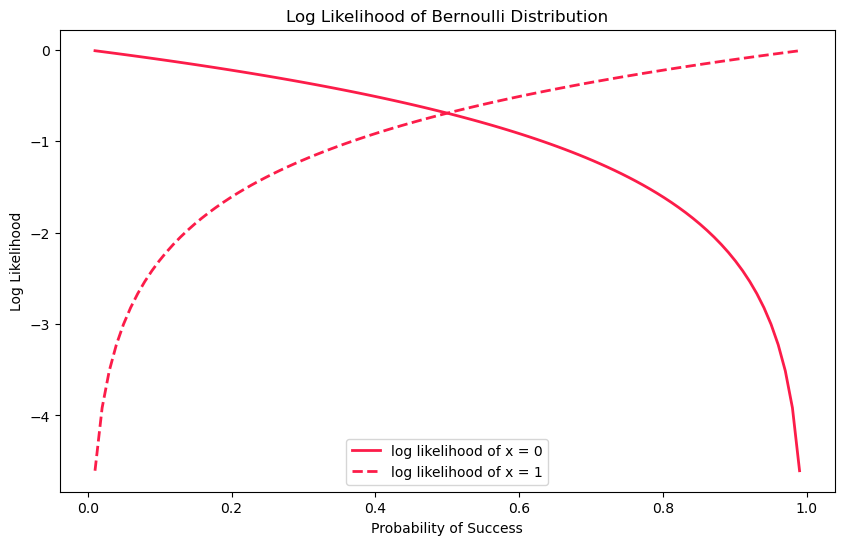

In [3]:
# 베르누이 분포의 성공 확률 p를 0에서 1까지 변화시키며 로그 우도 계산
p = np.linspace(0.01, 0.99, 100)

# 베르누이 시행 결과 0 or 1
x = np.array([0,1])

# 로그 우도 계산
log_likelihood_0 = np.log(1 - p) # x = 0
log_likelihood_1 = np.log(p) # x = 1

plt.figure(figsize=(10, 6))

plt.plot(p, log_likelihood_0, color='#fc1c49', linewidth=2, label='log likelihood of x = 0')
plt.plot(p, log_likelihood_1, color='#fc1c49', linewidth=2, label='log likelihood of x = 1', linestyle='--')

plt.title("Log Likelihood of Bernoulli Distribution")
plt.xlabel("Probability of Success")
plt.ylabel("Log Likelihood")
plt.legend()
plt.show()



In [4]:
elu_alpha = 1.0

In [5]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


def elu(x: np.ndarray, alpha: float = 1.0) -> np.ndarray:
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))


def post_processing(predictions: np.ndarray) -> np.ndarray:
    return np.where(predictions < 0.5, 0, 1)


def display_results(inputs: np.ndarray, predictions: np.ndarray) -> None:
    processed_predictions = post_processing(predictions)
    print("Input (A, B) | Predicted Y ")
    print("----------------------------")
    for i in range(inputs.shape[1]):
        print(f"    {inputs[0, i]}, {inputs[1, i]} | {processed_predictions[0, i]}")


def initialize_parameters() -> dict[str, np.ndarray]:
    parameters = {
        "W1": np.random.randn(2, 2),  # 가중치 input layer 2 -> hidden layer 2
        "b1": np.zeros((2, 1)),  # hidden layer 2
        "W2": np.random.randn(1, 2),  # 가중치 hidden layer 2 -> output layer 1
        "b2": np.zeros((1, 1))  # output layer 1
    }
    return parameters


def compute_loss(Y: np.ndarray, Y_hat: np.ndarray) -> np.ndarray:
    # BCE (Binary Cross Entropy) == Negative Log Likelihood
    m = Y.shape[0]
    return -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) / m


def forward_propagation(
        X: np.ndarray,
        parameters: dict[str, np.ndarray],
) -> tuple[np.ndarray, np.ndarray]:
    # 가중치와 편향 추출
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # 입력층에서 히든레이어까지 연산
    Z1 = np.dot(W1, X) + b1
    A1 = elu(Z1)

    # 히든레이어에서 출력층까지의 연산
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return A1, A2


def backword_propagation(
        parameters: dict[str, np.ndarray],
        A1: np.ndarray,
        A2: np.ndarray,
        X: np.ndarray,
        Y: np.ndarray,
        alpha: float = 1.0,
) -> dict[str, np.ndarray]:
    m = X.shape[1]
    W2 = parameters["W2"]

    dZ2 = (A2 - Y) * A2 * (1 - A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.dot(W2.T, dZ2)
    dZ1[A1 <= 0] = dZ1[A1 <= 0] * alpha * np.exp(A1[A1 <= 0])
    
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
    }
    return gradients


def update_parameters(
        parameters: dict[str, np.ndarray],
        grads: dict[str, np.ndarray],
        learning_rate: float = 0.01,
) -> dict[str, np.ndarray]:
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]

    return parameters


inputs = np.array([[0,0], [0,1], [1,0], [1,1]]).T
outputs = np.array([0,1,1,0])

parameters = initialize_parameters()
predictions = forward_propagation(inputs, parameters)[1]

display_results(inputs, predictions)


Input (A, B) | Predicted Y 
----------------------------
    0, 0 | 1
    0, 1 | 0
    1, 0 | 1
    1, 1 | 1


In [7]:
for i in range(200000):
    A1, A2 = forward_propagation(inputs, parameters)
    grads = backword_propagation(parameters, A1, A2, inputs, outputs)
    parameters = update_parameters(parameters, grads)
    loss = compute_loss(outputs, A2)
    
    if i > 0 and i % 10000 == 0:
        print(f"{i=}, {loss=}")
    
predicted_outputs = forward_propagation(inputs, parameters)[1]
print(predicted_outputs)
display_results(inputs, predicted_outputs)

i=10000, loss=0.019578960506289506
i=20000, loss=0.01892073694909381
i=30000, loss=0.01831926564611437
i=40000, loss=0.017767042744840835
i=50000, loss=0.01725786535702787
i=60000, loss=0.016786557634875132
i=70000, loss=0.01634876378805806
i=80000, loss=0.015940789612086184
i=90000, loss=0.015559479696013907
i=100000, loss=0.015202121228266535
i=110000, loss=0.01486636787736114
i=120000, loss=0.014550178997320817
i=130000, loss=0.014251770654926086
i=140000, loss=0.01396957586555648
i=150000, loss=0.013702212066944483
i=160000, loss=0.013448454329797061
i=170000, loss=0.013207213151234033
i=180000, loss=0.012977515936034661
i=190000, loss=0.0127584914658617
[[0.01153038 0.98764983 0.98708225 0.01308472]]
Input (A, B) | Predicted Y 
----------------------------
    0, 0 | 0
    0, 1 | 1
    1, 0 | 1
    1, 1 | 0
